### Import necessary libraries

In [7]:
import pandas as pd  # Import necessary libraries
import numpy as np  # Import necessary libraries
from datetime import datetime, timedelta  # Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix  # Import necessary libraries
from sklearn.preprocessing import StandardScaler  # Import necessary libraries
import matplotlib.pyplot as plt 

In [8]:
import warnings 
warnings.warn("Ignore")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20464\1152742507.py:2: UserWarning: Ignore
  warnings.warn("Ignore")


In [9]:

# Load the dataset
data = pd.read_csv('E:\Hack\icu_readmission_data_1000.csv')

# Display the first few rows of the dataset
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20464\2678901005.py:2: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_csv('E:\Hack\icu_readmission_data_1000.csv')


,Patient_ID,Age,Gender,BMI,Diagnosis_Code,Comorbidities,Days_in_ICU,Number_of_Procedures,Number_of_Medications,Ventilator_Support,...,Creatinine_Level,Blood_Glucose_Level,Average_Heart_Rate,Average_Blood_Pressure,Average_Temperature,Oxygen_Saturation,Discharge_Planning,Follow_Up_Visit,Discharge_Medications,Readmission_Within_30_Days
0,1,68,Male,26.0,J18,2,2,5,6,1,...,2.4,148.6,78.5,103.0,38.1,92.4,1,0,1,0
1,2,28,Male,29.7,N17,4,11,5,2,0,...,2.2,108.5,94.9,127.0,38.8,96.6,0,0,6,0
2,3,73,Male,33.2,I10,1,4,3,12,0,...,1.9,94.5,77.9,130.8,37.4,90.6,0,1,9,0
3,4,34,Female,34.3,N17,0,12,9,10,0,...,1.9,84.9,66.4,115.0,37.6,93.7,0,0,6,1
4,5,78,Female,36.8,J18,0,4,8,16,1,...,0.5,98.4,84.5,98.1,37.1,93.2,1,1,1,0


In [4]:
# Check for missing values
print(data.isnull().sum())

# Display dataset info
print(data.info())

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Diagnosis_Code                0
Comorbidities                 0
Days_in_ICU                   0
Number_of_Procedures          0
Number_of_Medications         0
Ventilator_Support            0
WBC_Count                     0
Hemoglobin_Level              0
Creatinine_Level              0
Blood_Glucose_Level           0
Average_Heart_Rate            0
Average_Blood_Pressure        0
Average_Temperature           0
Oxygen_Saturation             0
Discharge_Planning            0
Follow_Up_Visit               0
Discharge_Medications         0
Readmission_Within_30_Days    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient_ID                  1000 non-null   int64  
 1   A

In [5]:
# Statistical summary of numerical columns
data.describe()

,Patient_ID,Age,BMI,Comorbidities,Days_in_ICU,Number_of_Procedures,Number_of_Medications,Ventilator_Support,WBC_Count,Hemoglobin_Level,Creatinine_Level,Blood_Glucose_Level,Average_Heart_Rate,Average_Blood_Pressure,Average_Temperature,Oxygen_Saturation,Discharge_Planning,Follow_Up_Visit,Discharge_Medications,Readmission_Within_30_Days
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,500.500000,53.333000,29.182600,1.96500,9.781000,5.017000,10.231000,0.482000,8.067700,14.005500,1.507500,125.129400,80.215000,134.65160,37.447100,92.834600,0.517000,0.499000,4.538000,0.2000
std,288.819436,20.475677,6.227164,1.41059,5.507392,2.600668,5.345111,0.499926,2.285544,2.370337,0.577743,31.237053,11.734047,26.48608,0.861518,4.291729,0.499961,0.500249,2.845814,0.4002
min,1.000000,18.000000,18.600000,0.00000,1.000000,1.000000,1.000000,0.000000,4.000000,10.000000,0.500000,70.300000,60.100000,90.00000,36.000000,85.000000,0.000000,0.000000,0.000000,0.0000
25%,250.750000,36.000000,23.700000,1.00000,5.000000,3.000000,6.000000,0.000000,6.100000,11.900000,1.000000,97.750000,69.700000,111.07500,36.700000,89.175000,0.000000,0.000000,2.000000,0.0000
50%,500.500000,53.000000,29.150000,2.00000,10.000000,5.000000,11.000000,0.000000,8.000000,14.000000,1.500000,124.950000,80.800000,135.05000,37.400000,93.000000,1.000000,0.000000,4.000000,0.0000
75%,750.250000,71.000000,34.500000,3.00000,15.000000,7.000000,15.000000,1.000000,10.000000,16.000000,2.000000,151.850000,90.000000,157.50000,38.200000,96.500000,1.000000,1.000000,7.000000,0.0000
max,1000.000000,89.000000,40.000000,4.00000,19.000000,9.000000,19.000000,1.000000,12.000000,18.000000,2.500000,179.800000,100.000000,180.00000,39.000000,100.000000,1.000000,1.000000,9.000000,1.0000


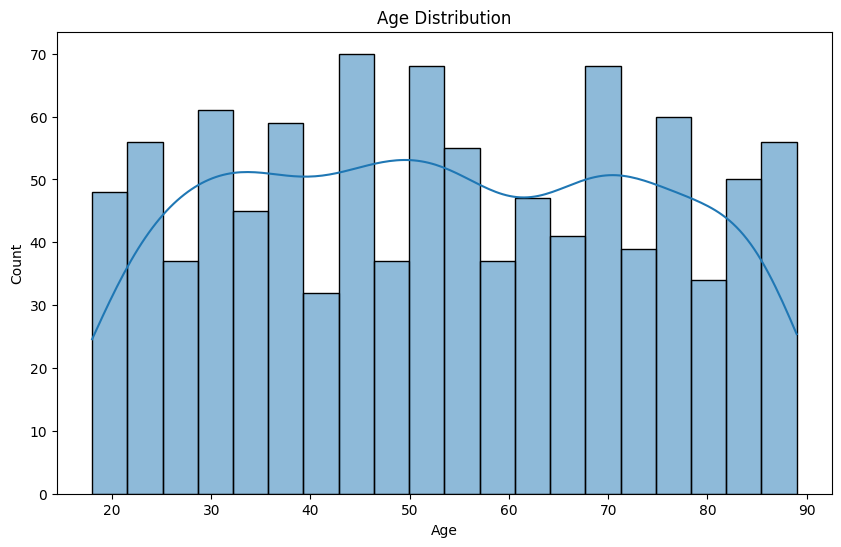

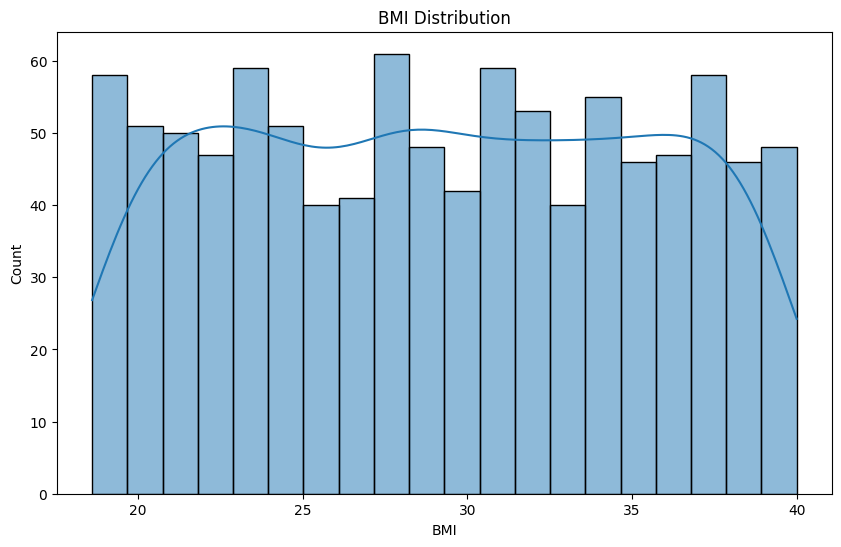

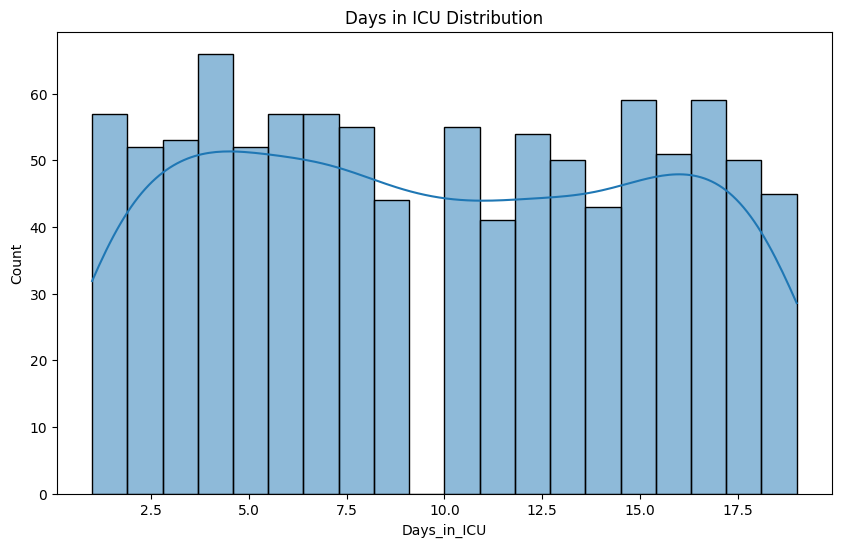

In [12]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], bins=20, kde=True)
plt.title("BMI Distribution")
plt.show()

# Distribution of Days in ICU
plt.figure(figsize=(10, 6))
sns.histplot(data['Days_in_ICU'], bins=20, kde=True)
plt.title("Days in ICU Distribution")
plt.show()

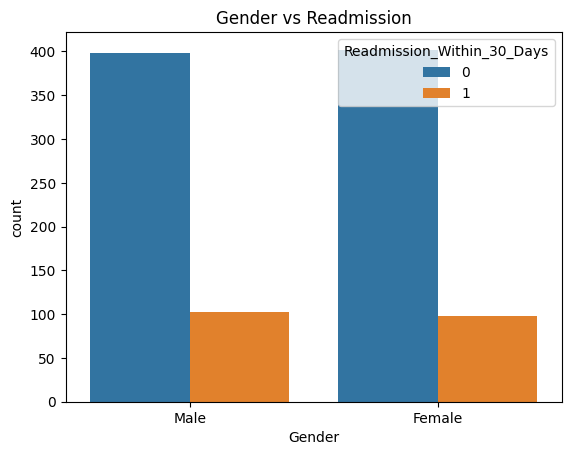

In [13]:
# Gender vs Readmission
sns.countplot(x='Gender', hue='Readmission_Within_30_Days', data=data)
plt.title("Gender vs Readmission")
plt.show()


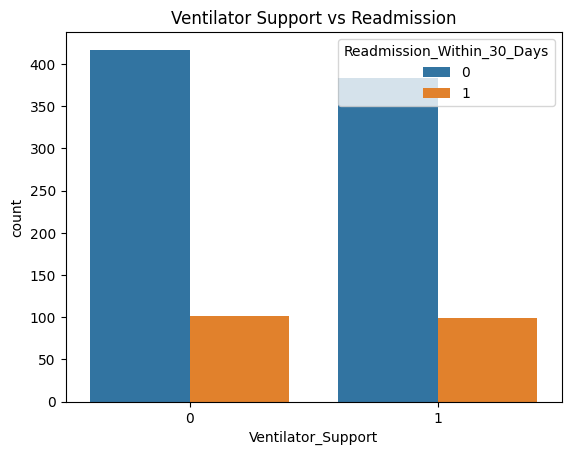

In [14]:
# Ventilator Support vs Readmission
sns.countplot(x='Ventilator_Support', hue='Readmission_Within_30_Days', data=data)
plt.title("Ventilator Support vs Readmission")
plt.show()


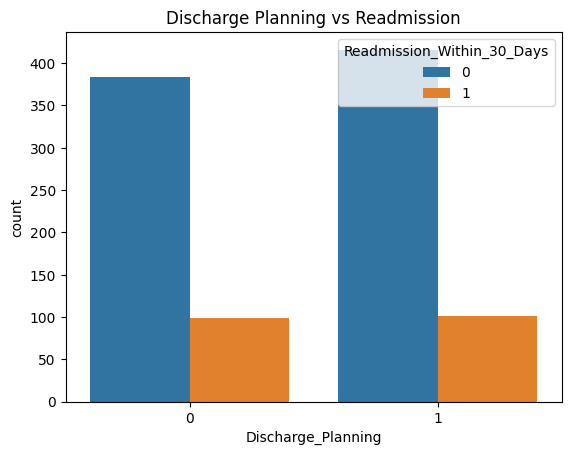

In [15]:
# Discharge Planning vs Readmission
sns.countplot(x='Discharge_Planning', hue='Readmission_Within_30_Days', data=data)
plt.title("Discharge Planning vs Readmission")
plt.show()